# Livingston Analysis

Thus far, all analysis has been done on the Hanford detector. What about Livingston? Are the same trends there?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from gwpy.timeseries import TimeSeries
from gwpy.spectrogram import Spectrogram
from gwpy.frequencyseries import FrequencySeries

## Spectrogram

Comparing the spectrograms from H1 and L1

In [18]:
min_time = 1263097420
max_time = 1263098020

hdata = TimeSeries.fetch_open_data('H1', min_time, max_time)
ldata = TimeSeries.fetch_open_data('L1', min_time, max_time) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


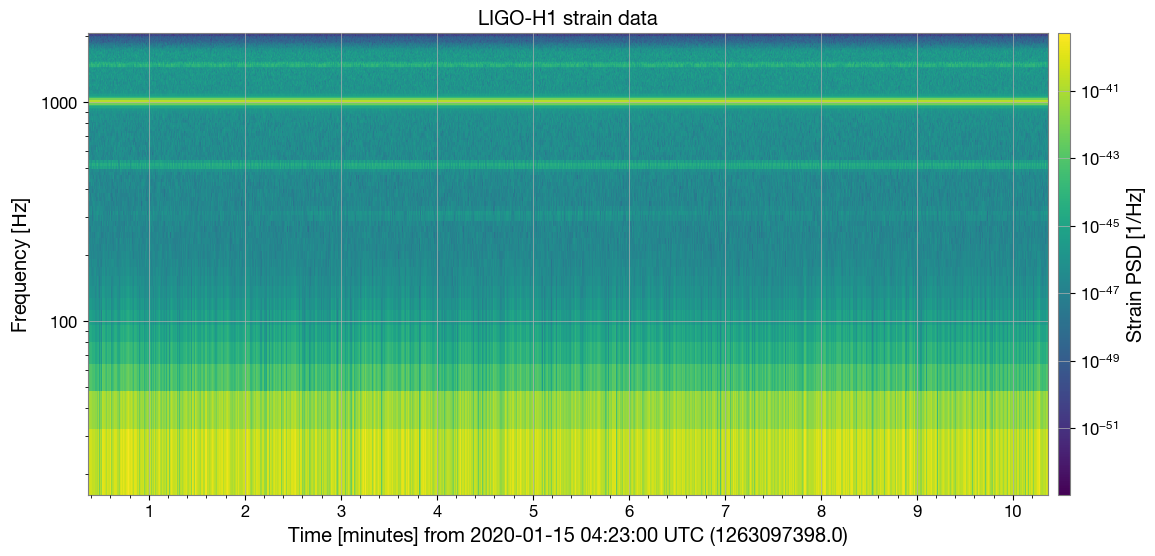

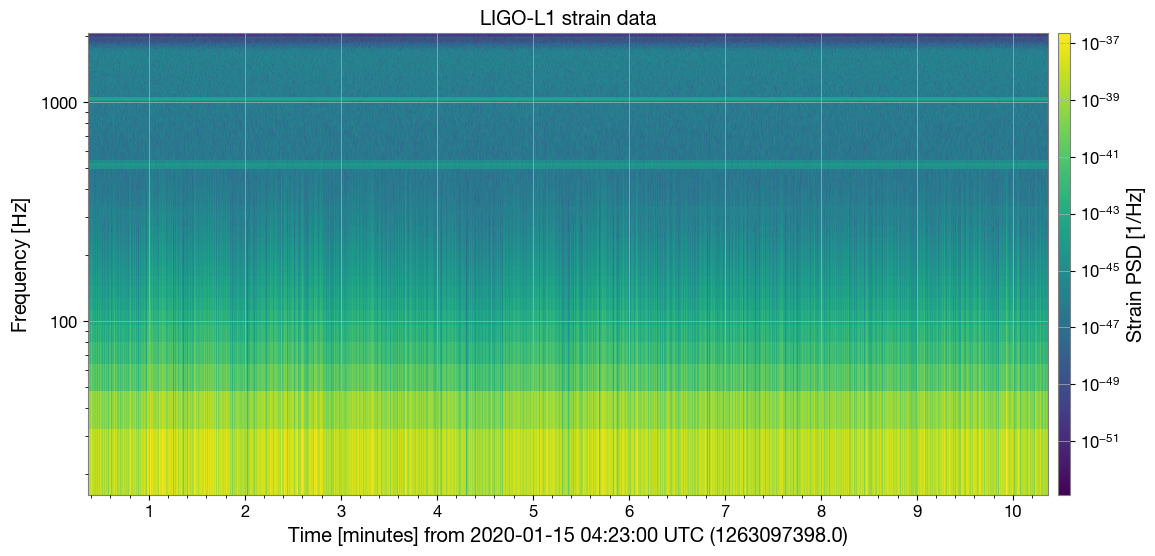

In [19]:
spectrogram = hdata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-H1 strain data')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

spectrogram = ldata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-L1 strain data')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

## Frequency Power Time Series

The spectrograms look similar. What about the FPTS?

In [20]:
# A function for making a frequency-specific strain time series
# When chosing a frequency, keep in mind the trade-off between frequency resolution and time resolution
# The available frequencies will be multiples of the 1/fftlength; however, they may not be proper
# integer multiples; chose an even power of two in order to get integer frequencies.
def freq_specific_time_series(data, start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = data.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time + analysis_length / 2, dt)

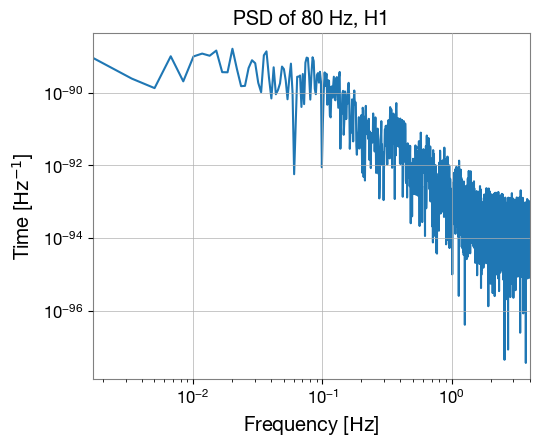

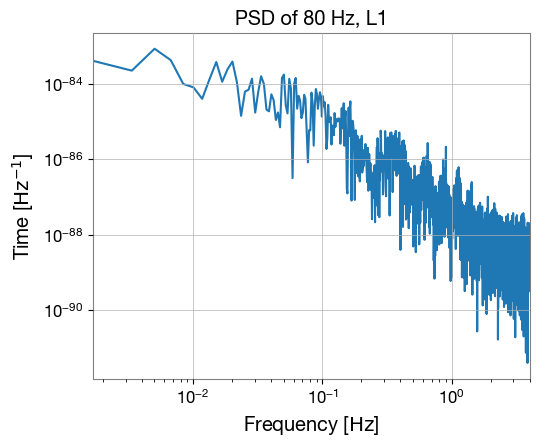

In [21]:
fss = freq_specific_time_series(hdata, min_time, 4, 0.125, max_time, 80)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, H1')
plot.show()

fss = freq_specific_time_series(ldata, min_time, 4, 0.125, max_time, 80)
psd = fss.psd()
plot = psd.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, L1')
plot.show()

The two PSDs seem to be generally similar, except in scale.

## 304 Hz Result

H1 had three distinct peaks in the 304 Hz PSD. Will L1 also have this result?

In [22]:
# Analyzing original data
min_time1 = 1263097420
max_time1 = 1263098020
ldata1 = TimeSeries.fetch_open_data('L1', min_time1, max_time1)

# Next 10 mins
min_time2 = 1263098020
max_time2 = 1263098620
ldata2 = TimeSeries.fetch_open_data('L1', min_time2, max_time2)

# Next next 10 mins
min_time3 = 1263098620
max_time3 = 1263099220
ldata3 = TimeSeries.fetch_open_data('L1', min_time3, max_time3)

# Next next next 10 mins
min_time4 = 1263099220
max_time4 = 1263099820
ldata4 = TimeSeries.fetch_open_data('L1', min_time4, max_time4)

# Next next next next 10 mins
min_time5 = 1263099820
max_time5 = 1263100420
ldata5 = TimeSeries.fetch_open_data('L1', min_time5, max_time5)


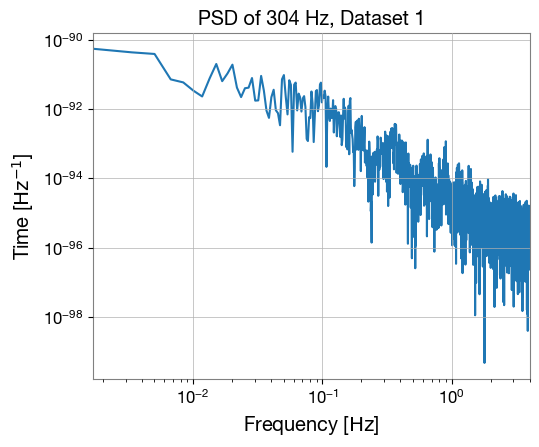

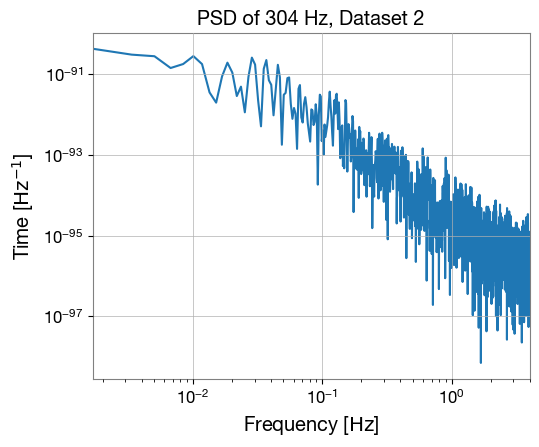

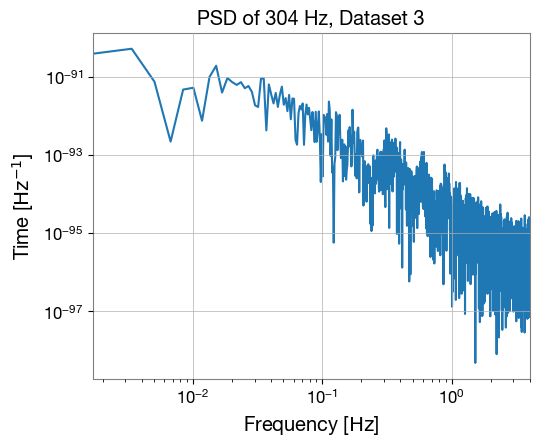

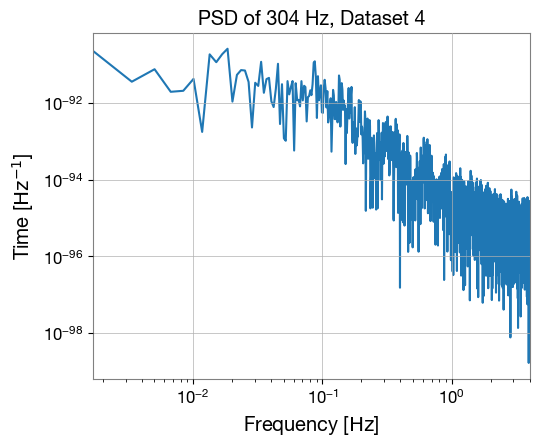

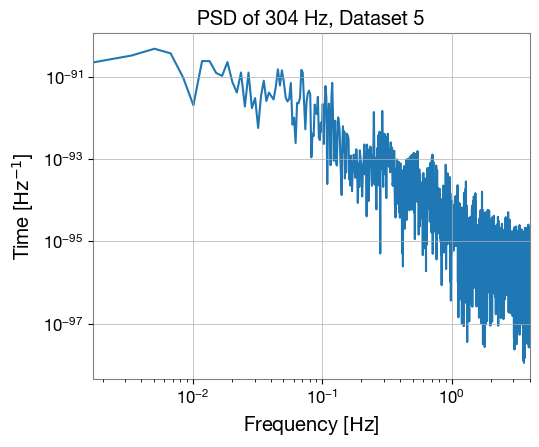

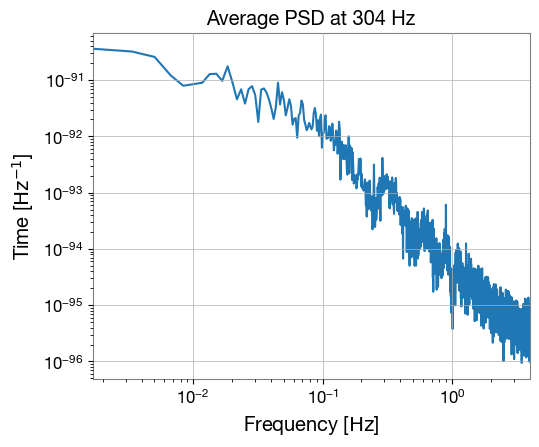

In [23]:
fss1 = freq_specific_time_series(ldata1, min_time1, 4, 0.125, max_time1, 304)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 1')
plot.show()

fss2 = freq_specific_time_series(ldata2, min_time2, 4, 0.125, max_time2, 304)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 2')
plot.show()

fss3 = freq_specific_time_series(ldata3, min_time3, 4, 0.125, max_time3, 304)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 3')
plot.show()

fss4 = freq_specific_time_series(ldata4, min_time4, 4, 0.125, max_time4, 304)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 4')
plot.show()

fss5 = freq_specific_time_series(ldata5, min_time5, 5, 0.125, max_time5, 304)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 5')
plot.show()

# Taking the average of the five PSDs
# I'm just taking the simple average
avgPSD = (psd1[:-4] + psd2[:-4] + psd3[:-4] + psd4[:-4] + psd5) / 5
plot = avgPSD.plot()
ax = plot.gca()
ax.set_title('Average PSD at 304 Hz')
plot.show()

The result does *not* seem to hold for Livingston. There appear to be no major spikes in the PSD, and any that appear seem to be in different places and much less strongly separate from the baseline noise patterns.

# 512 Hz Result

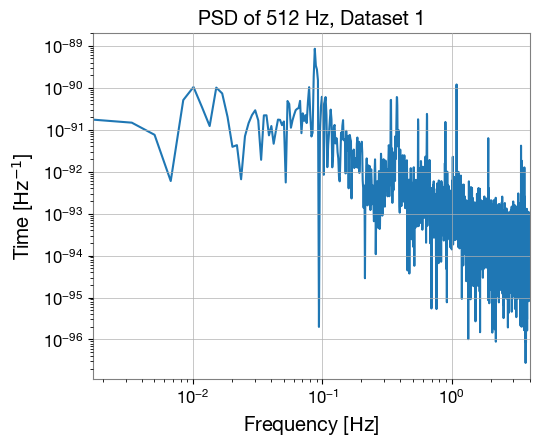

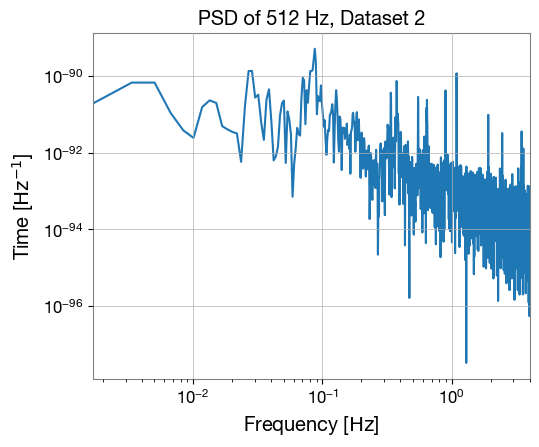

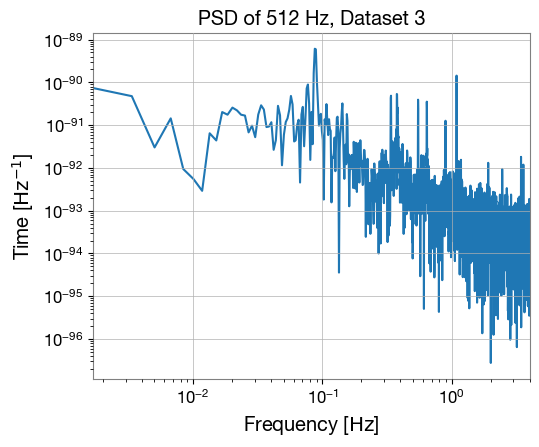

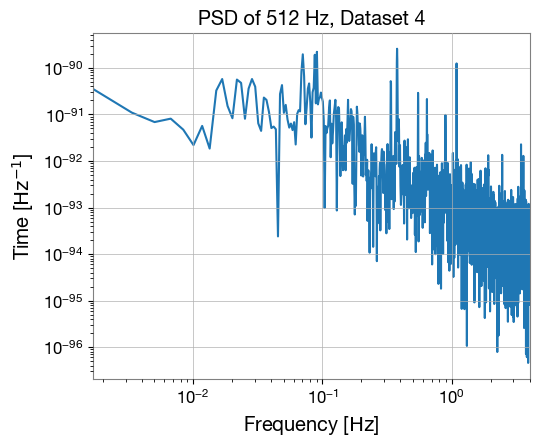

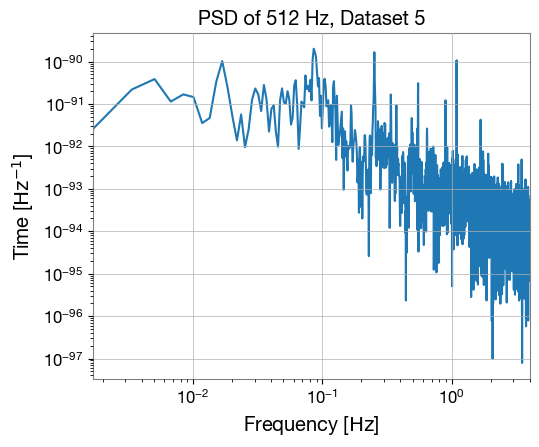

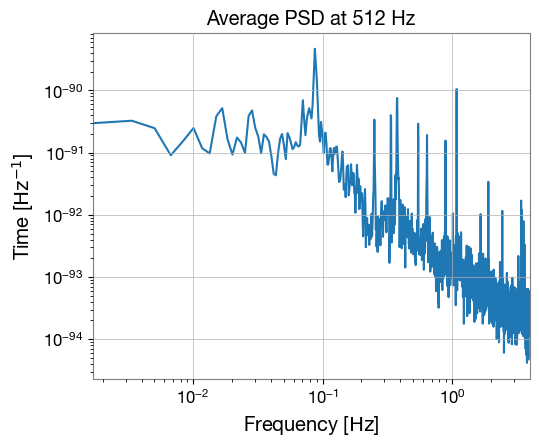

In [30]:
fss1 = freq_specific_time_series(ldata1, min_time1, 4, 0.125, max_time1, 512)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 1')
plot.show()

fss2 = freq_specific_time_series(ldata2, min_time2, 4, 0.125, max_time2, 512)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 2')
plot.show()

fss3 = freq_specific_time_series(ldata3, min_time3, 4, 0.125, max_time3, 512)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 3')
plot.show()

fss4 = freq_specific_time_series(ldata4, min_time4, 4, 0.125, max_time4, 512)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 4')
plot.show()

fss5 = freq_specific_time_series(ldata5, min_time5, 5, 0.125, max_time5, 512)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 5')
plot.show()

# Taking the average of the five PSDs
# I'm just taking the simple average
avgPSD = (psd1[:-4] + psd2[:-4] + psd3[:-4] + psd4[:-4] + psd5) / 5
plot = avgPSD.plot()
ax = plot.gca()
ax.set_title('Average PSD at 512 Hz')
plot.show()

## Correlation of Low Frequency Noises

In the Hanford data, noise levels at low frequencies were highly correlated. Is this the same in the Livingston detectors? Based on the spectrogram earlier, this seems to be the case. But let's find out quantitatively.

In [24]:
def plot_fss_at_freq(frequency):
    fss = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, frequency)
    plot1 = fss.plot()
    ax1 = plot1.gca()
    ax1.set_title(f'LIGO H1 Frequency-Specific Time Series at {frequency} Hz')
    plot1.show()

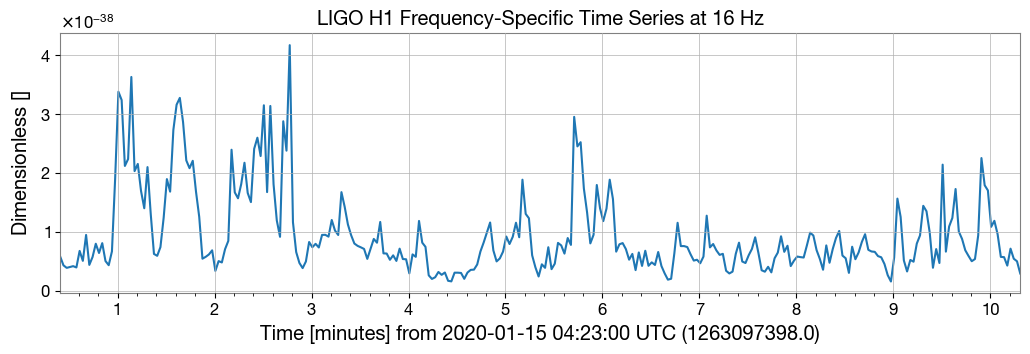

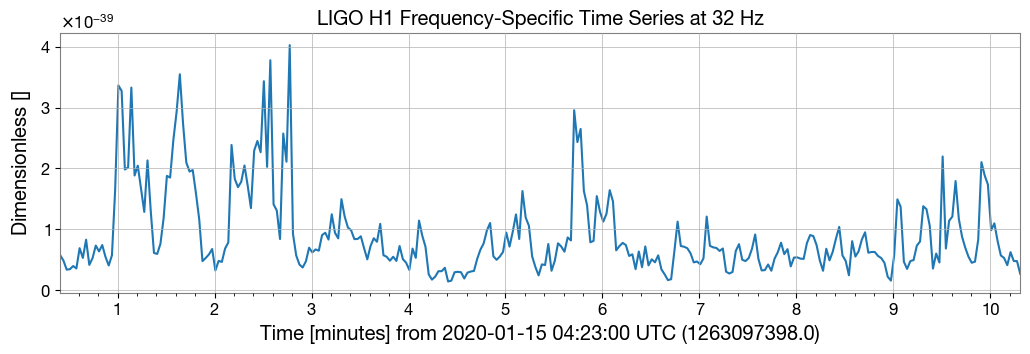

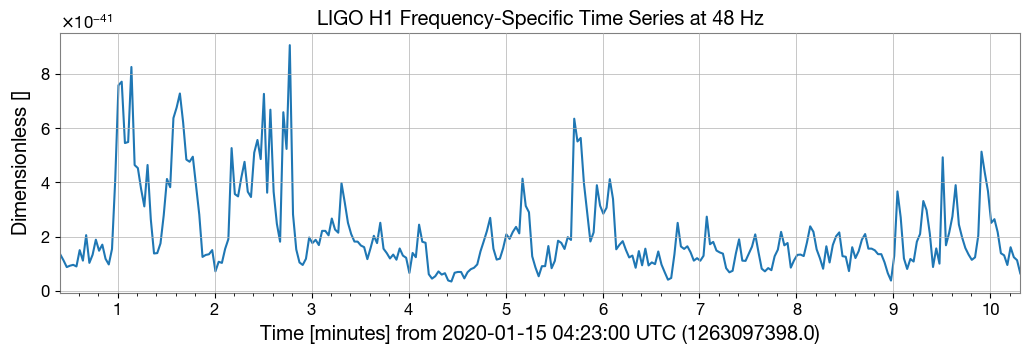

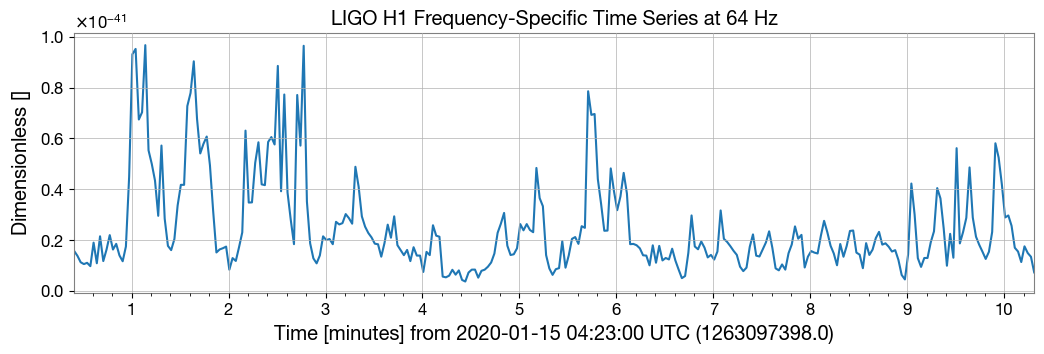

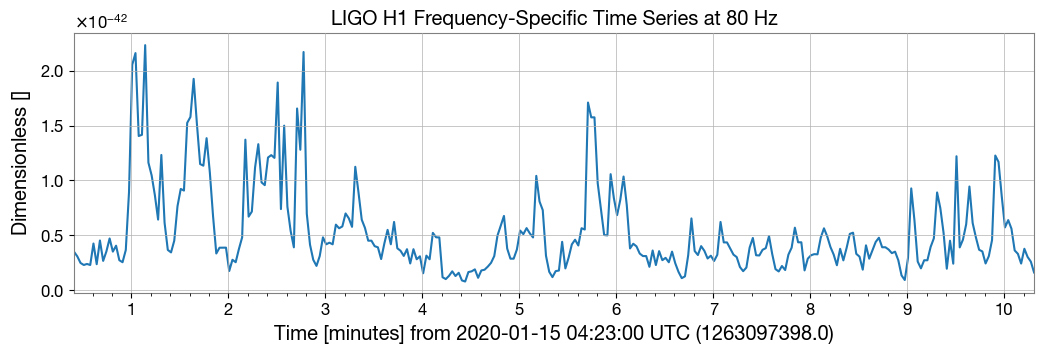

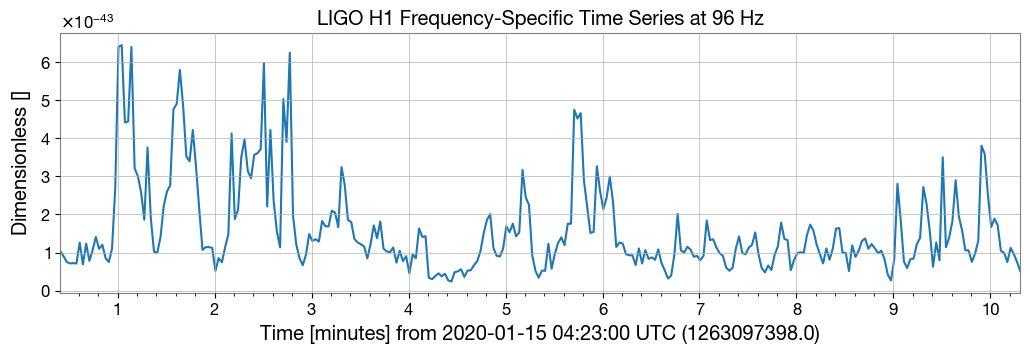

In [25]:
i = 16
while i < 100:
    plot_fss_at_freq(i)
    i += 16

### Normalizing the Frequency Power Time Series

In [26]:
def plot_normalized_fss_at_freq(frequency):
    fss = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, frequency)
    fss = fss / np.median(fss)
    plot1 = fss.plot()
    ax1 = plot1.gca()
    ax1.set_title(f'Normalized LIGO H1 Frequency-Specific Time Series at {frequency} Hz')
    plot1.show()

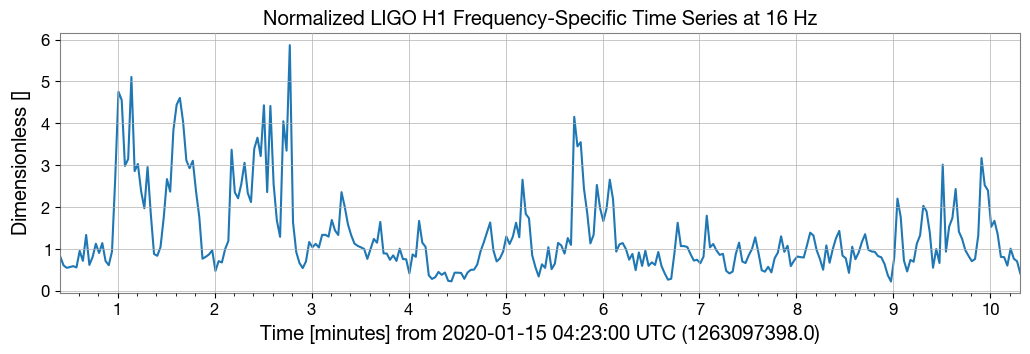

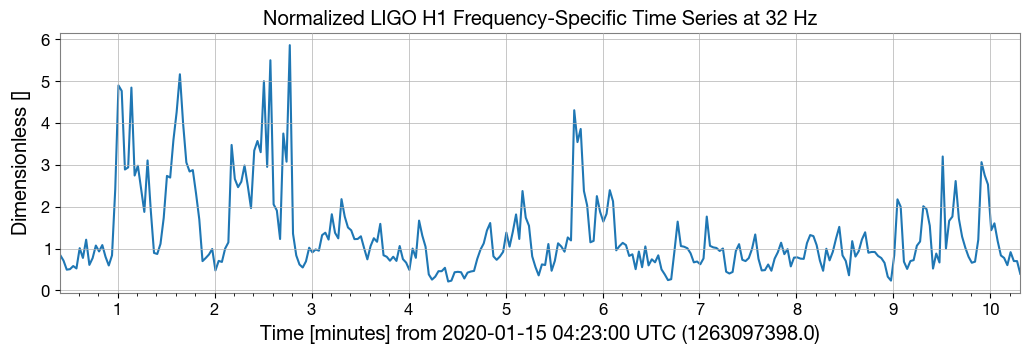

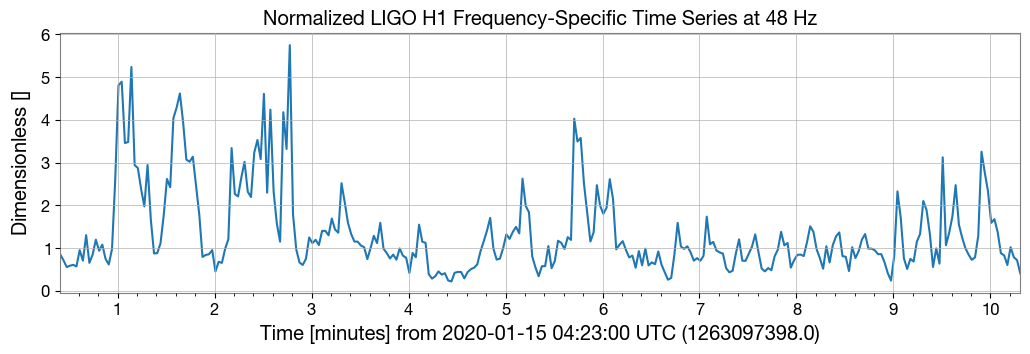

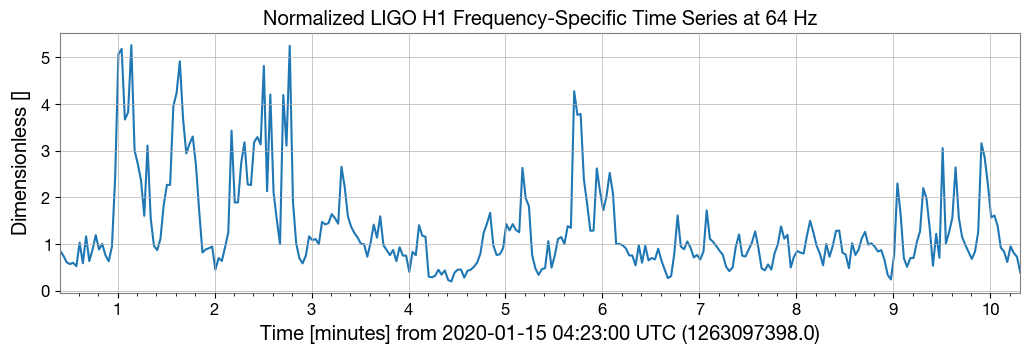

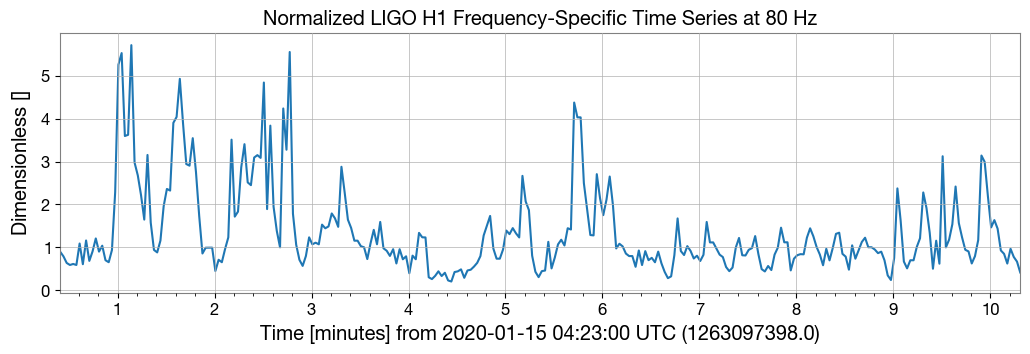

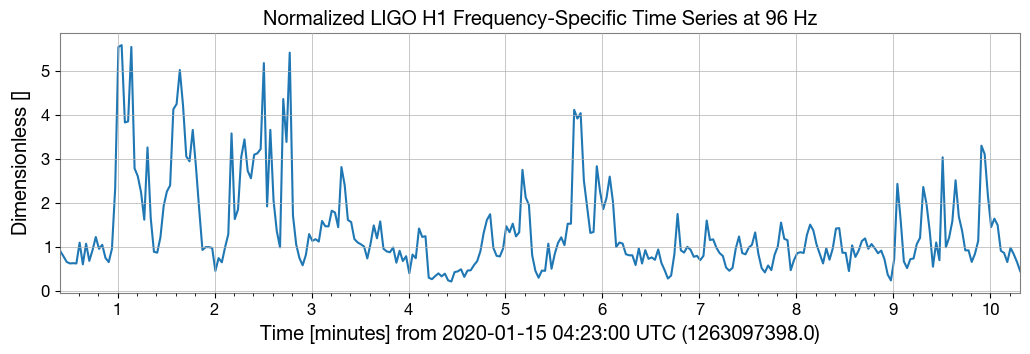

In [27]:
i = 16
while i < 100:
    plot_normalized_fss_at_freq(i)
    i += 16

### Analyzing the Correlation

In [28]:
fss16 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 16)
normalized_fss16 = fss16 / np.amax(fss16)

fss32 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 32)
normalized_fss32 = fss32 / np.amax(fss32)

fss48 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 48)
normalized_fss48 = fss48 / np.amax(fss48)

fss64 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 64)
normalized_fss64 = fss64 / np.amax(fss64)

fss80 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 80)
normalized_fss80 = fss80 / np.amax(fss80)

fss96 = freq_specific_time_series(ldata1, min_time1, 5, 2, max_time1, 96)
normalized_fss96 = fss96 / np.amax(fss96)

In [29]:
data1 = np.column_stack((normalized_fss16.value, normalized_fss32.value, normalized_fss48.value, normalized_fss64.value, normalized_fss80.value, normalized_fss96.value))
corr_matrix1 = np.corrcoef(data1, rowvar = False) # Compute matrix form Pearson product-moment correlation coefficients (R)
                                                # Should I use Spearman instead? Are the variables normally distributed?
np.set_printoptions(precision=3)
print(corr_matrix1)

[[1.    0.991 0.997 0.99  0.985 0.981]
 [0.991 1.    0.988 0.98  0.974 0.969]
 [0.997 0.988 1.    0.995 0.991 0.989]
 [0.99  0.98  0.995 1.    0.997 0.995]
 [0.985 0.974 0.991 0.997 1.    0.998]
 [0.981 0.969 0.989 0.995 0.998 1.   ]]


The result from Hanford of having highly correlated noise at low frequencies seems to hold in the Livingston data.